In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
%matplotlib inline

C:\Users\Admin\anaconda\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Admin\anaconda\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
C:\Users\Admin\anaconda\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"
C:\Users\Admin\anaconda\lib\site-packages\scipy\__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


# HR Dataset

In [2]:
#Loading in the HR data
HR_sample = pd.read_json("C:\\Users\Admin\OneDrive\Documents\CVC Research\Python Fitbit Data\Python Script and Sample Data\HR Sample.json")
HR_sample.head()

,dateTime,value
0,2021-11-12 01:56:26,"{'bpm': 70, 'confidence': 0}"
1,2021-11-12 01:56:42,"{'bpm': 70, 'confidence': 0}"
2,2021-11-12 01:56:52,"{'bpm': 70, 'confidence': 1}"
3,2021-11-12 01:57:05,"{'bpm': 70, 'confidence': 1}"
4,2021-11-12 01:57:18,"{'bpm': 70, 'confidence': 1}"


In [3]:
#separating bpm and confidence into individual columns
HR = pd.concat([HR_sample.drop(['value'], axis=1), HR_sample['value'].apply(pd.Series)], axis=1)
HR.head()

,dateTime,bpm,confidence
0,2021-11-12 01:56:26,70,0
1,2021-11-12 01:56:42,70,0
2,2021-11-12 01:56:52,70,1
3,2021-11-12 01:57:05,70,1
4,2021-11-12 01:57:18,70,1


In [4]:
#HR.info()

In [5]:
HR_min = HR.groupby(pd.Grouper(key='dateTime', axis=0, 
                      freq='min', sort=True)).mean()
HR_min.reset_index(level=0, inplace=True)

HR_min.head()

,dateTime,bpm,confidence
0,2021-11-12 01:56:00,70.000000,0.333333
1,2021-11-12 01:57:00,70.000000,0.666667
2,2021-11-12 01:58:00,68.285714,0.714286
3,2021-11-12 01:59:00,63.000000,1.333333
4,2021-11-12 02:00:00,61.833333,0.166667


In [6]:
#Saving data above as an excel spreadsheet
HR_min.to_excel(r'C:\\Users\Admin\Downloads\HR_min.xlsx', index = False, header=True)

In [260]:
#HR_min.info()

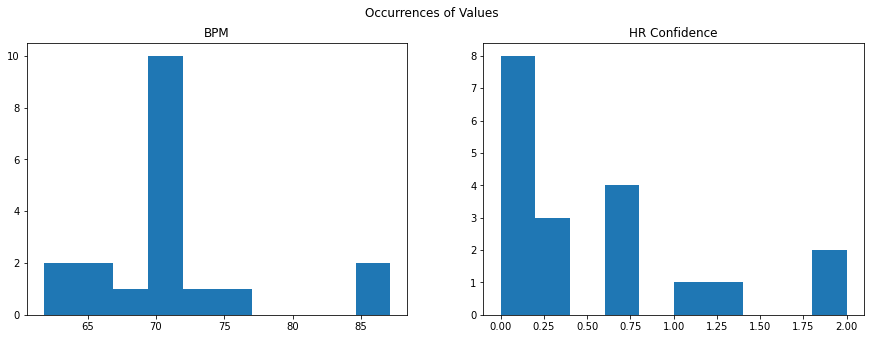

In [259]:
#Visualize occurrences of each heart rate
plt.subplots(1,2,figsize=(15,5))#one example of sizing

plt.subplot(1, 2, 1)
plt.hist(HR_min["bpm"])
plt.title("BPM")

plt.subplot(1, 2, 2)
plt.hist(HR_min["confidence"])
plt.title("HR Confidence")

plt.suptitle("Occurrences of Values")
plt.show()

# Steps Dataset

In [11]:
#Load in the steps data
Steps = pd.read_json("C:\\Users\Admin\OneDrive\Documents\CVC Research\Python Fitbit Data\Python Script and Sample Data\steps-2022-03-11.json")
Steps.head(100)

,dateTime,value
0,2022-03-11 16:05:00,12
1,2022-03-11 16:06:00,22
2,2022-03-11 16:10:00,14
3,2022-03-11 16:11:00,0
4,2022-03-11 16:12:00,10
...,...,...
95,2022-03-11 18:28:00,0
96,2022-03-11 18:29:00,0
97,2022-03-11 18:31:00,0
98,2022-03-11 18:46:00,0


In [13]:
from datetime import datetime, timedelta

df = Steps
df['PST'] = df.dateTime + timedelta(hours = -8)
df.head()

,dateTime,value,PST
0,2022-03-11 16:05:00,12,2022-03-11 08:05:00
1,2022-03-11 16:06:00,22,2022-03-11 08:06:00
2,2022-03-11 16:10:00,14,2022-03-11 08:10:00
3,2022-03-11 16:11:00,0,2022-03-11 08:11:00
4,2022-03-11 16:12:00,10,2022-03-11 08:12:00


In [ ]:
# every minute and the steps in that day
# find MPA, VPA, LPA for each day

In [8]:
Steps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13587 entries, 0 to 13586
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   dateTime  13587 non-null  datetime64[ns]
 1   value     13587 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 212.4 KB


In [9]:
sum(Steps.value)

194328

### Total Steps/Day

In [29]:
#Looking at steps per day for this individual
#step_day = Steps.groupby(pd.Grouper(key='dateTime', axis=0,freq='D', sort=True)).sum()
#step_day.head()

In [30]:
#Looking at steps per day for this individual
step_day = Steps.groupby(pd.Grouper(key='PST', axis=0, 
                      freq='D', sort=True)).sum()
step_day.head()

,value
PST,
2022-03-11,2219
2022-03-12,2992
2022-03-13,4169
2022-03-14,11615
2022-03-15,9471


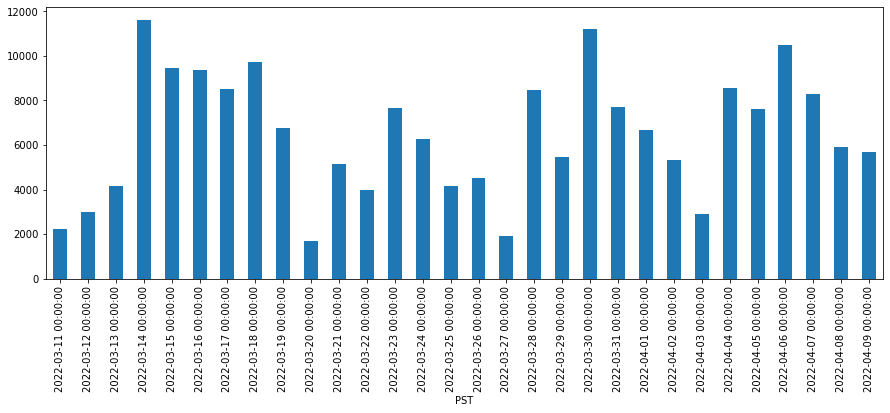

In [31]:
#Plotting the steps per day of the individual
step_day["value"].plot.bar(figsize=(15, 5));

### MVPA step analysis

In [41]:
#group
step_min = Steps.groupby(pd.Grouper(key='PST', axis=0, 
                      freq='min', sort=True)).sum()
#step_min.reset_index(level=0, inplace=True)

step_min.head()

,value
PST,
2022-03-11 08:05:00,12
2022-03-11 08:06:00,22
2022-03-11 08:07:00,0
2022-03-11 08:08:00,0
2022-03-11 08:09:00,0


minutes with steps >99/min (MPA)<br>
minutes with steps >129 steps (VPA)<br>
minutes with 0 steps (sedentary)<br>
otherwise regular

In [42]:
#create a new column for the parameters above
def f(row):
    if row['value'] ==0:
        val = 'Sedentary'
    elif row['value']<99:
        val = 'Regular'
    elif row['value']<129:
        val = 'MPA'
    elif row['value']>=129:
        val = 'VPA'
    return val

step_min['MVPA'] = step_min.apply(f, axis=1)
step_min.head()

,value,MVPA
PST,,
2022-03-11 08:05:00,12,Regular
2022-03-11 08:06:00,22,Regular
2022-03-11 08:07:00,0,Sedentary
2022-03-11 08:08:00,0,Sedentary
2022-03-11 08:09:00,0,Sedentary


In [43]:
#Prepare the data for graphing and group by day
occur = pd.DataFrame(step_min.groupby([step_min.index.date, 'MVPA']).size())
occur.reset_index(level=0, inplace=True)
occur.reset_index(level=0, inplace=True)
occur.columns = ['MVPA', 'Day', 'Count']
occur.set_index('Day', inplace=True)

occur.head()

,MVPA,Count
Day,,
2022-03-11,Regular,103
2022-03-11,Sedentary,852
2022-03-12,Regular,136
2022-03-12,Sedentary,1304
2022-03-13,MPA,1


# NEED THIS DATA

In [47]:
### THIS IS WHAT I NEEDED
occur['Day'] = occur.index
newf = occur.pivot(index='Day', columns='MVPA')
newf.head()

Count                      
MVPA         MPA Regular Sedentary VPA
Day                                   
2022-03-11   NaN   103.0     852.0 NaN
2022-03-12   NaN   136.0    1304.0 NaN
2022-03-13   1.0   158.0    1281.0 NaN
2022-03-14  69.0   120.0    1251.0 NaN
2022-03-15  41.0   142.0    1257.0 NaN

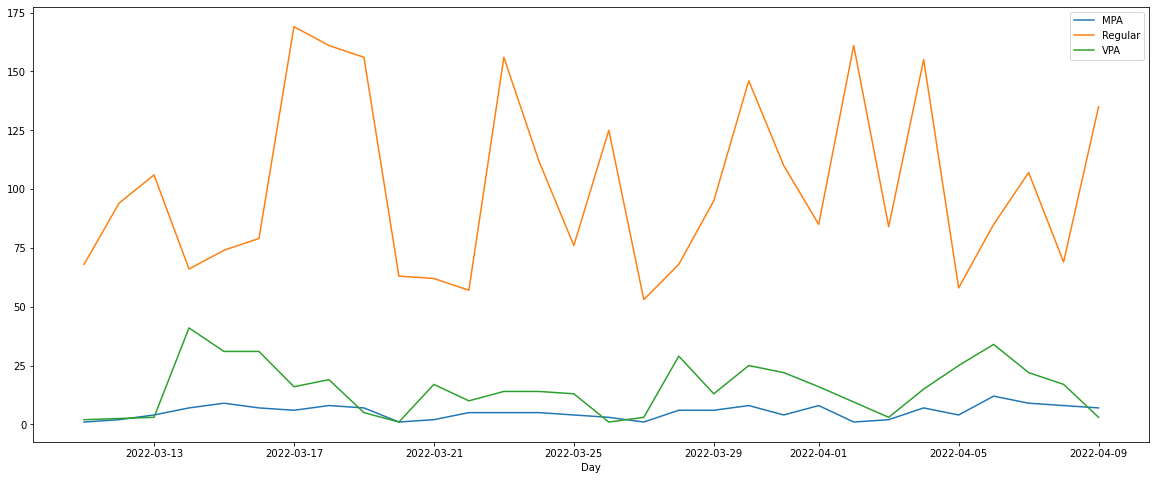

In [35]:
occur = occur[occur['MVPA'] != 'Sedentary'] # used to take off sedentary
occur.groupby('MVPA')["Count"].plot(figsize=(20, 8), legend=True);

minutes with 1-19 steps (incidental)<br>
minutes with 20-39 steps (sporadic)<br>
minutes with 40-59 steps (purposeful)<br>
minutes with 60-79 steps (slow walk)<br>
minutes with 80-99 steps (med walk)<br>
minutes with 100-119 steps (brisk walk)

In [48]:
#create a new column for the parameters above
def b(row):
    if row['value'] == 0:
        val = 'sedentary'
    elif row['value'] <20:
        val = 'incidental'
    elif row['value']<40:
        val = 'sporadic'
    elif row['value']<60:
        val = 'purposeful'
    elif row['value']<80:
        val = 'slow walk'
    elif row['value']<100:
        val = 'med walk'
    elif row['value']<120:
        val = 'brisk walk'
    elif row['value']>=120:
        val = 'RUN'
    return val

step_min['Walk'] = step_min.apply(b, axis=1)
step_min.head()

,value,MVPA,Walk
PST,,,
2022-03-11 08:05:00,12,Regular,incidental
2022-03-11 08:06:00,22,Regular,sporadic
2022-03-11 08:07:00,0,Sedentary,sedentary
2022-03-11 08:08:00,0,Sedentary,sedentary
2022-03-11 08:09:00,0,Sedentary,sedentary


In [49]:
#Convert table above to Excel Spreadsheet
step_min.to_excel (r'C:\\Users\Admin\Downloads\Steps.xlsx', index = True, header=True)

In [50]:
#Group the table by days
walk = pd.DataFrame(step_min.groupby([step_min.index.date, 'Walk']).size())
walk.reset_index(level=0, inplace=True)
walk.reset_index(level=0, inplace=True)
walk.columns = ['Walk', 'Day', 'Count']
#walk.head()

In [51]:
#Prepare the data for plotting
walk = walk[walk['Walk'] != 'sedentary'] # used to take off none aka 0 steps
walk.set_index('Day', inplace=True)
#walk.head()

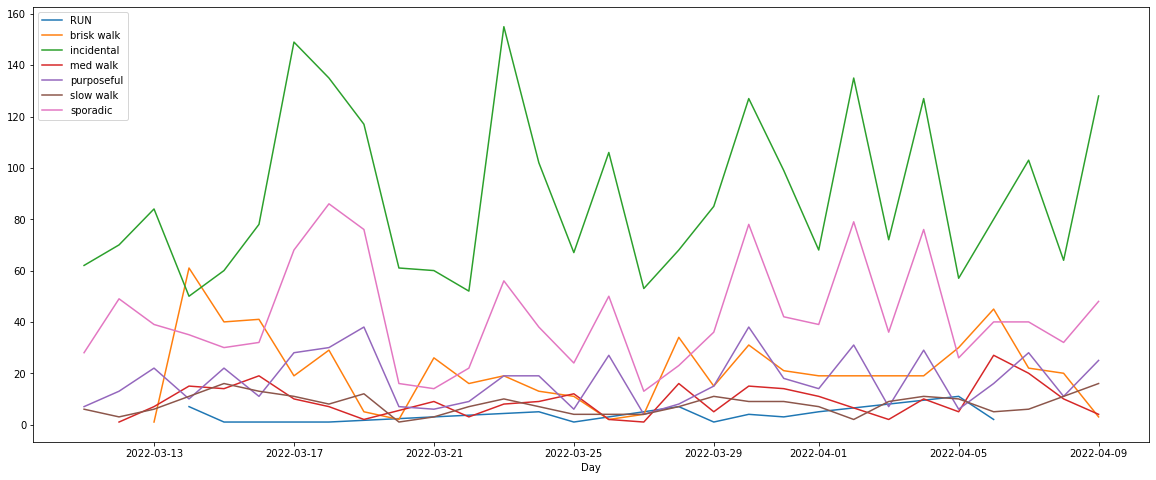

In [52]:
walk.groupby('Walk')["Count"].plot(figsize=(20, 8), legend=True);